## Seaborn 플로팅 함수 개요

이 장에서는 다양한 함수에 대한 개괄적 소개를 다룬다

### 유사한 작업에 대한 유사기능
모든 기능은 최상위 수준에서 접근 가능하다.  
관계형, 분산형, 범주형 데이터에 따라 시각화 할 수 있는 모듈은 여러개가 있지만 각  모듈에 여러 기능을 공통으로 사용 가능하다.

예를 들어, distribution 모듈은 데이터 포인트의 분포를 나타내는데 특화된 함수를 정의한다.  
여기에는 histogram과 같은 친숙한 방법이 포함되어 있다.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

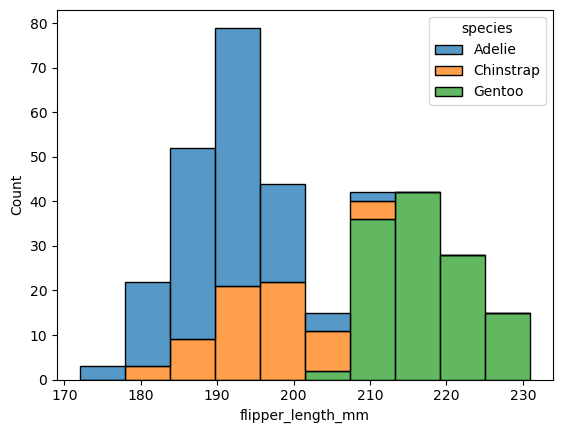

In [4]:
# histplot으로 데이터의 히스토그램을 볼수 있다.
# hue = 'species'는 해당 컬럼의 분류에 따라 다른 색으로 나타나게 한다.
# multiple = 'stack' 은 하나의 막대에 여러 막대가 쌓여 나오도록 한다.
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

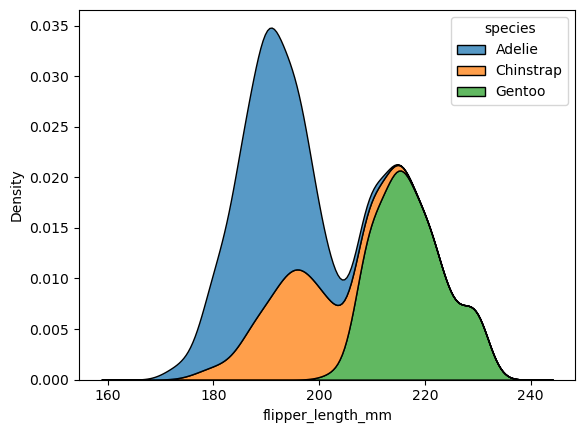

In [4]:
# kdeplot은 데이터의 값을 곡선으로 나타내 준다.
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

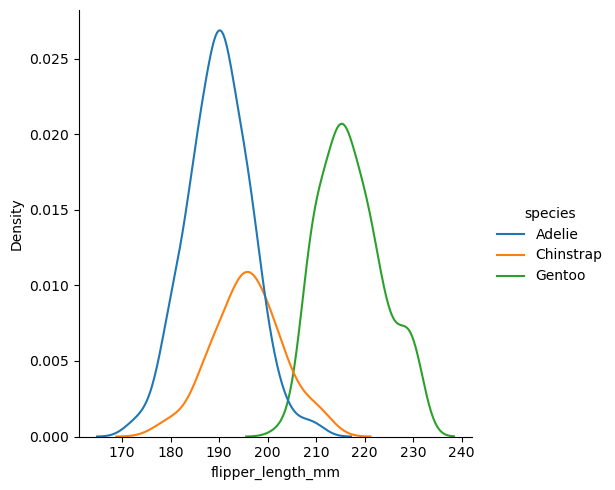

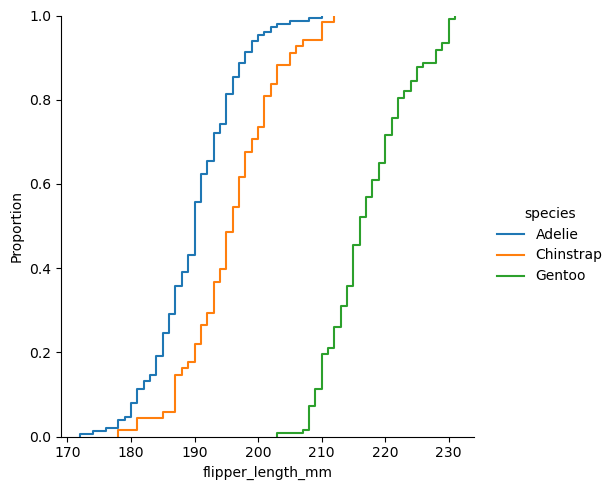

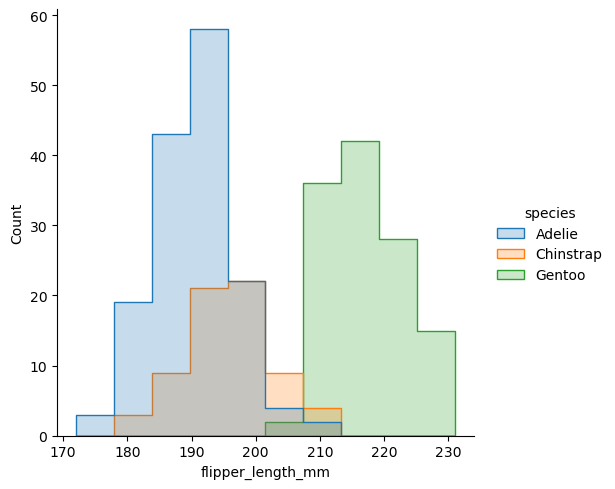

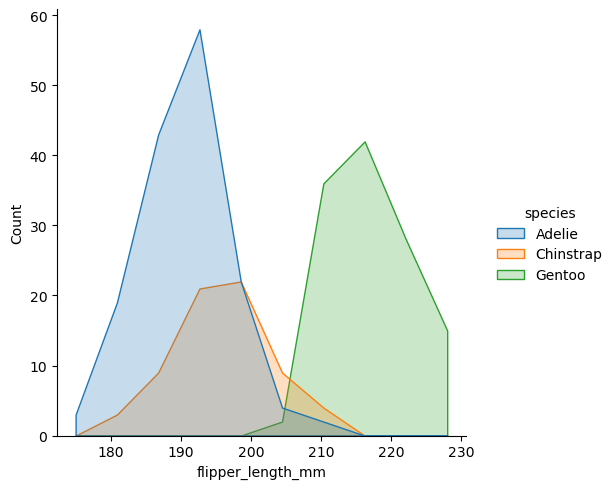

In [8]:
# displot에다가 kind, element 설정을 통해 그래프를 여러 이미지로 시각화 할 수 있다.
# 하지만 해당 값들은 stack해서 나타낸 것이 아니란 것을 참고.
# hue = '컬럼' : 지정된 컬럼의 unique한 값의 색을 다르게 지정한다
# kind ='' : 해당 그래프의 종류를 바꾼다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind='kde')
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind='ecdf')
sns.displot(data=penguins, x="flipper_length_mm", hue="species", element='step')
sns.displot(data=penguins, x="flipper_length_mm", hue="species", element='poly')

### 그래프 수준 vs 축 수준 함수

Seaborn은 '축 수준' 과 '그래프 수준'으로 교차 분류가 된다.  

  
그림 수준 함수 FacetGrid는 그림을 관리하는 Seaborn 객체(보통 a)를 통해 matplolib에 인터페이스 합니다. 각 모듈에는 다양한 축수준 기능에 대한 단일 인터페이스를 제공하는 단일 그림 수준 기능이 있다.   
조직은 아래와 같다.
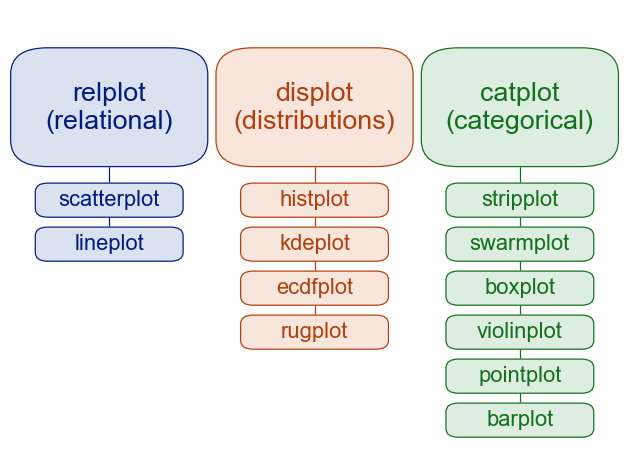

- 예를 들어 displot()은 분포 모듈의 그림 수준 함수이다.  
- histplot() 기본 동작은 뒤에서와 동일한 코드를 사용하여 히스토그램을 그리는 것이다.


### 그래프 수준 함수(figure-level)
1. 상위 함수로 그래프의 종류를 지정하는 파라미터를 사용해 데이터를 시각화한다.
2. displot(), catplot(), relplot() => seaborn.axisgrid.FacetGrid를 만든다.
3. matplotlib과 별개로 Seaborn의 figure를 만들어 그곳에 plotting 한다
4. 장점 : col 파라미터로 groupby를 할 수있다.
5. label이 그래프 밖에 있다.
  
### 축 수준 함수(axes-level)
1. 각 그래프의 종류에 특화된 함수이다.
2. 1가지 그래프를 그리는데 맞춤화 되어 있다.
3. countplot(), histplot(), stripplot() => AxesSubplot을 만든다
4. 다만, Matplotlib과의 호환이나 한 그래프위에 다른 그래프를 겹쳐 그릴 수 있다는 점에서 축 수준의 함수가 그래프 수준 함수보다 조금 더 유연하다.
5. 그래프 수준으로 그릴 수 없는 그래프는 축 수준 함수로 그린다.
6. matplotlib의 axes에 그래프를 그린다. 이 경우 plt.figure()와 같은 매서드로 레이아웃을 변경할 수 있다.
7. label이 그래프 안에 있다.


- 두 함수를 구분하는 기준은 Grid의 생성 여부이다.
- FacetGrid는 여러 그래프를 포함하는 상위 그래프로, FacetGrid에서 특정 하위 AxesSubplot 그래프만 추출해 원하는 조건을 적용할 수 있다.
- 사용하는 옵션이다른 경우도 있지만 보통은 옵션이 서로 호환 된다.

### 번외1(jointplot)
1. 두 가지 plot을 한 번에 다 볼 수 있다.
2. kind를 통해 plot 종류를 변경할 수 있다.
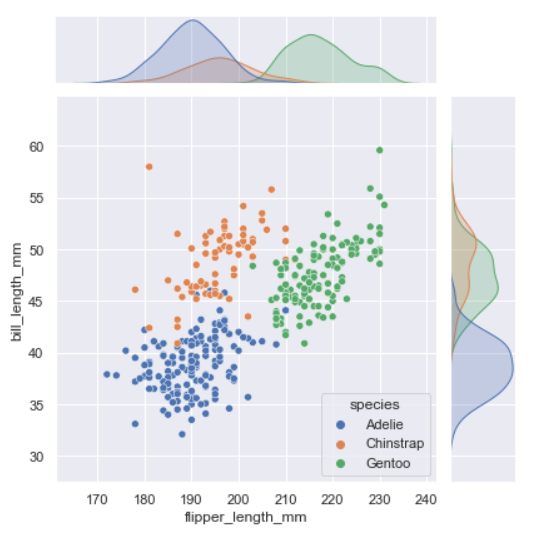

### 번외2(pairplot)
1. 두가지 변수 조합을 한번에 확인함.

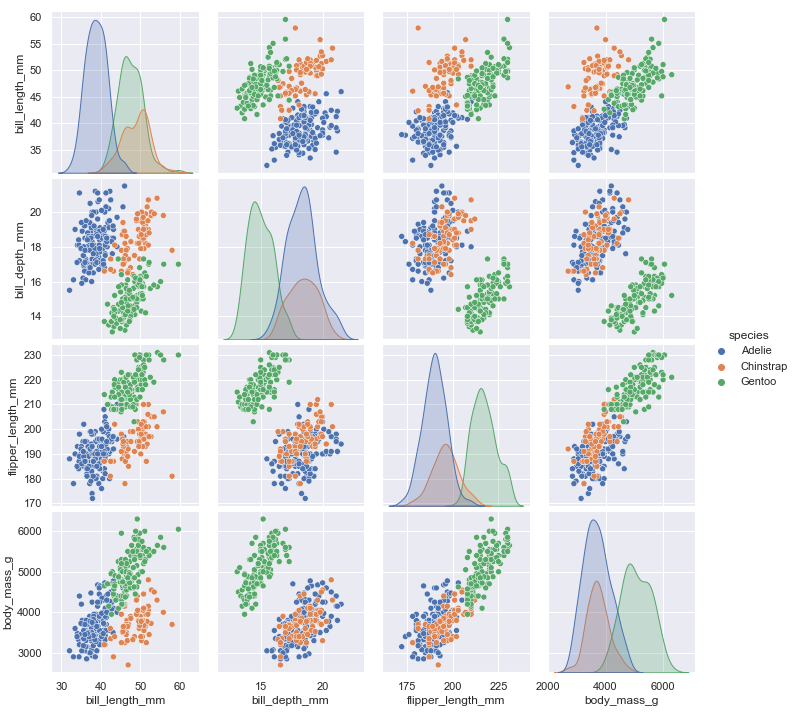

출처 : https://hwi-doc.tistory.com/entry/seaborn-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

#### 축함수 예시

<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

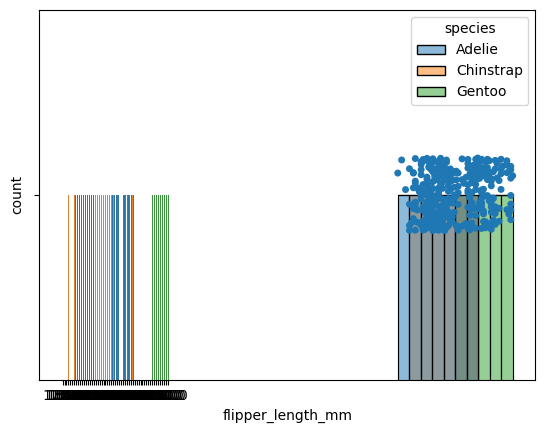

In [10]:
# 축수준 함수 : 겹치기 가능함
sns.countplot(data=penguins, x="flipper_length_mm", hue="species")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
sns.stripplot(data=penguins, x="flipper_length_mm", hue="species")


<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

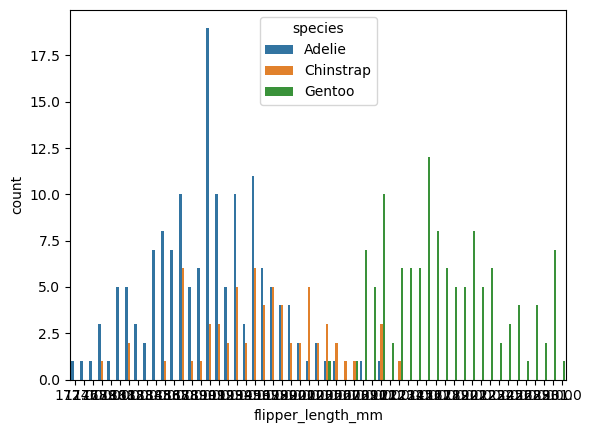

In [11]:
sns.countplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

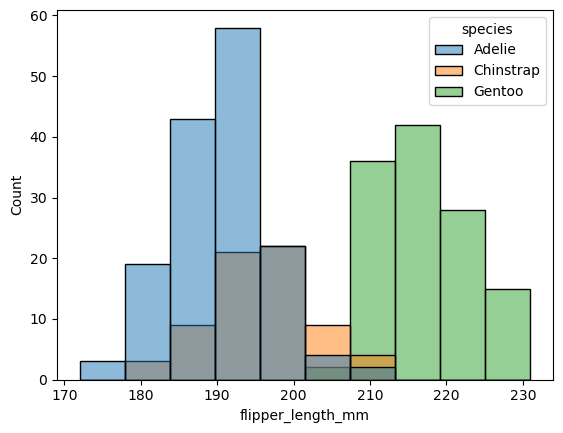

In [12]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm'>

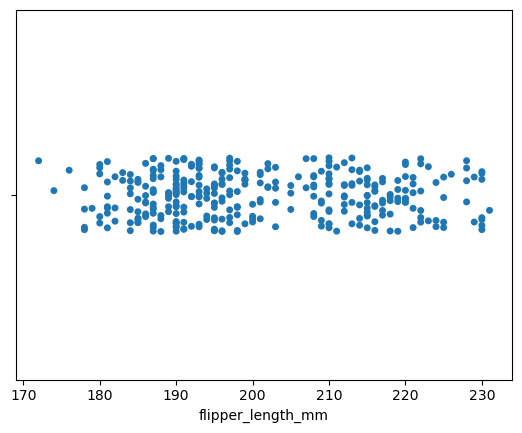

In [15]:
sns.stripplot(data=penguins, x="flipper_length_mm", hue="species")

#### 그림함수 예시

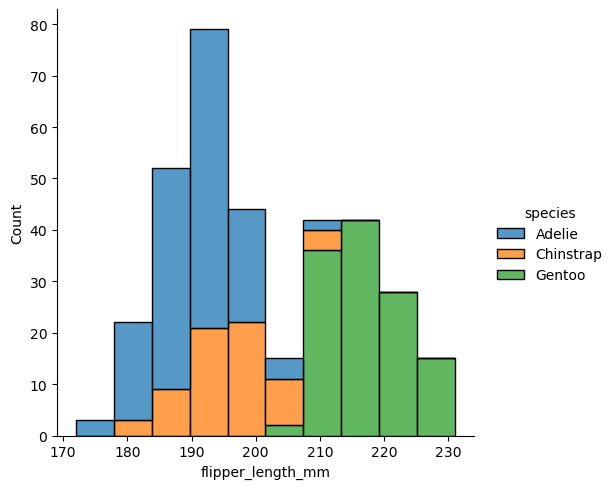

In [13]:
# multiple='stack' : 하나의 막대에 쌓아서 표현해 준다.(값을 쌓아서 표현해줌)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

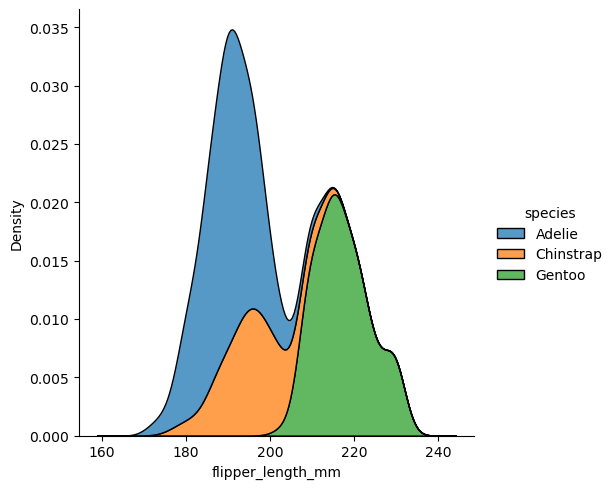

In [14]:
#  커널 밀도 플롯을 그리려면 동일한 코드(displot)를 사용하고 kind = 'kde'를 사용하거나
#  kdeplot() 함수를 사용해야한다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

- Figure 수준 플롯이 대부분 축 수준 플롯과 비슷해 보이지만 몇가지 차이점이 있다.
- 범례가 플롯 외부에 배치되어 있다.
- Figure 수준 함수가 제공하는 가장 유용한 기능은 여러 subplot이 있는 Figure를 쉽게 생성할 수 있다는 것이다.
- 예를들어, 동일한 축에 펭귄의 각 종에 대한 세가지 분포를 쌓는 대신 그림의 열에 각 분포를 플로팅하여 '패싯'할 수있다.

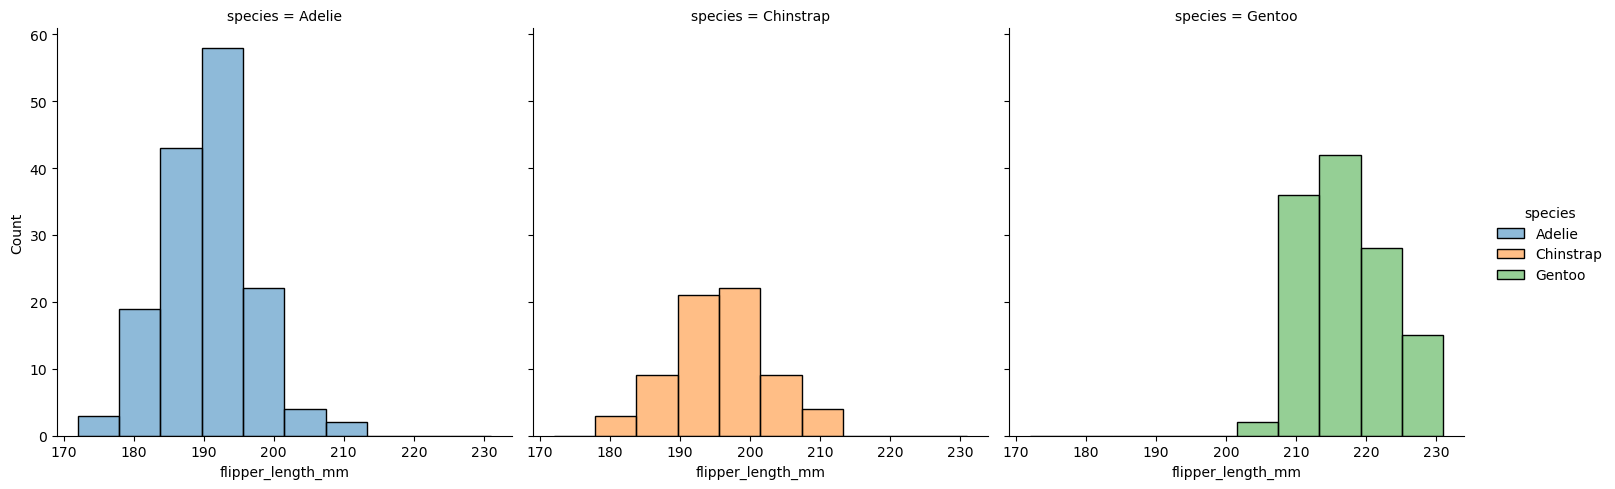

In [7]:
# col='컬럼' : 컬럼의 unique 값에 따라 그래프를 따로 그려낸다
# col_wrap=int : 따로 그래프를 그려낼 때 한줄에 몇개의 그래프를 표시할지 정한다(int값 만큼)

sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

- Figure 수준 함수는 해당하는 축 수준 함수를 래핑하고 종류별 키워드 인수(예:히스토그램의 bin크기)를 기본 함수로 전달 한다.
- 즉, 유연성이 떨어지지는 않는다. 그러나 단점이 있다.
- 종류별 매개변수가 함수 서명이나 독스트링에 설명되어 있지 않다.(기능에 대한 설명이 없다)
- 일부 기능은 검색하기 어려울 수 있으며, 특정 목표를 달성하는 방법을 이해하기 전에 설명서의 서로 다른 두 페이지를 살펴봐야 할 수도 있다.
=> 다른 기능을 사용 가능하여 유연한 인터페이스를 가지지만 해당 기능은 설명에 쓰여있지 않아서 검색이 어렵다.